=== M combined data preview ===
   WTeamID  Season  DayNum  WScore  LTeamID  LScore  NumOT  WFGM  WFGA  WFGM3  \
0     1222  117418    4064    4378    76083    3233      4  1596  3480    472   
1     1163  115388    4136    4689    73849    3614      2  1679  3346    497   
2     1345  111341    3745    4579    71650    3684      1  1602  3195    476   
3     1181  109323    3740    4453    69459    3271      0  1568  3180    520   
4     1120  109323    3557    4664    69703    3590      0  1629  3313    489   

   ...  LFTM  LFTA  LOR   LDR  LAst  LTO  LStl  LBlk   LPF  now  
0  ...   722  1055  454  1140   614  833   277   147   932   58  
1  ...   776  1083  415  1047   541  584   310   155   962   57  
2  ...   552   777  468  1031   753  593   337   143  1071   55  
3  ...   542   781  424  1055   602  596   279   190   885   54  
4  ...   907  1240  492  1082   482  641   334   157   985   54  

[5 rows x 34 columns] 

=== W combined data preview ===
   WTeamID  Season  DayNum  

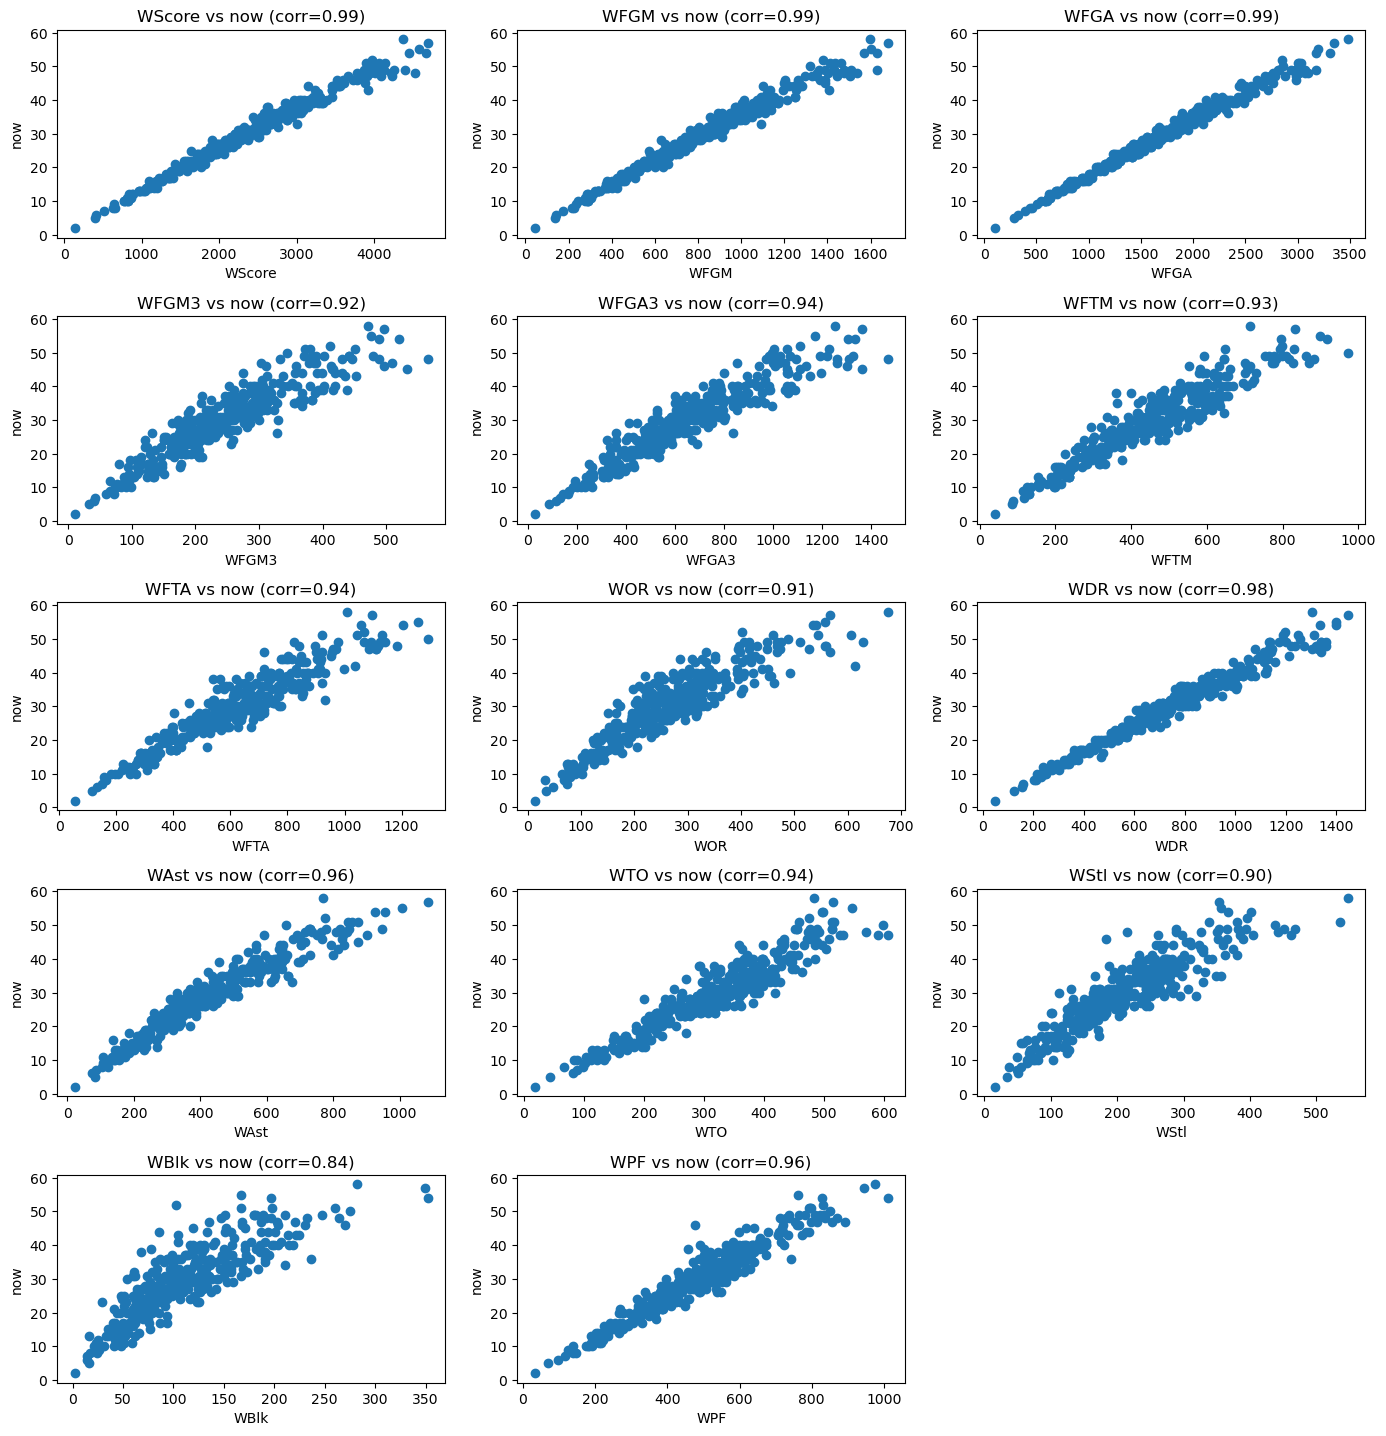

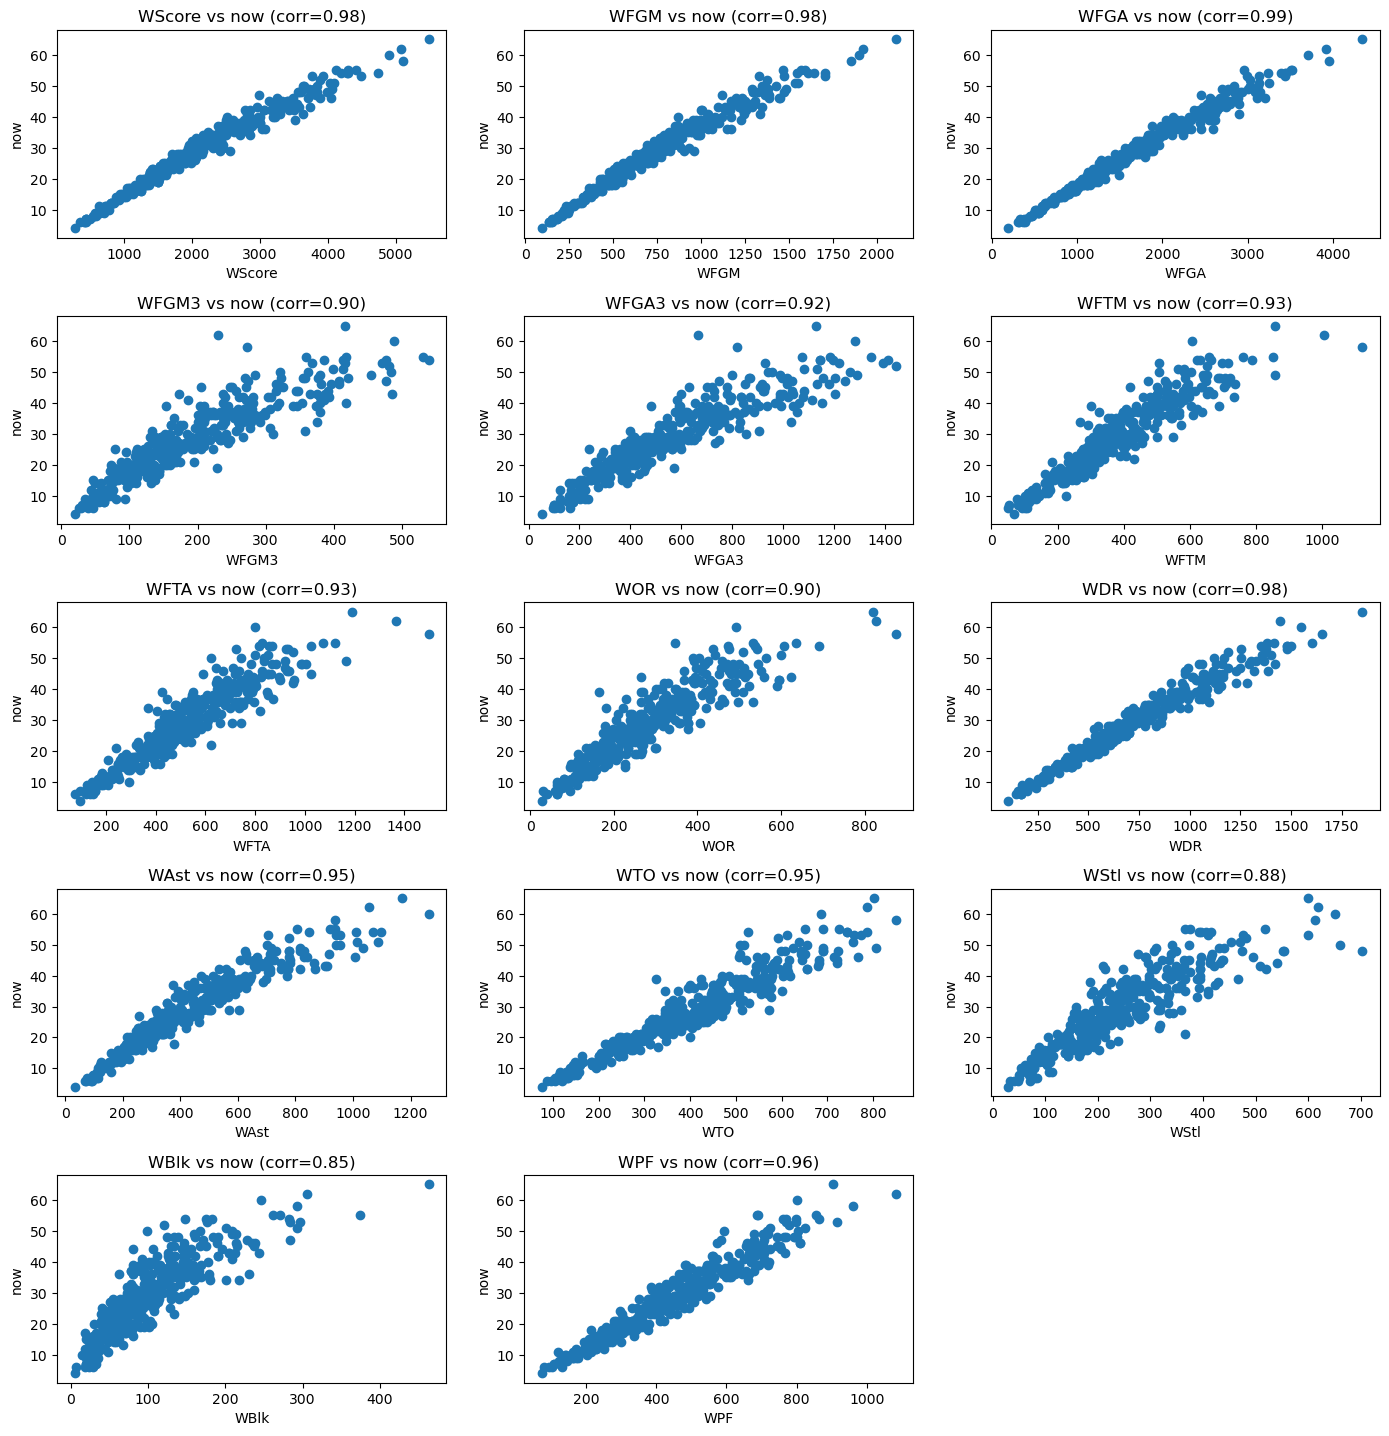

=== Ridge 결과 ===
   alpha  train_score  test_score  train_loss  test_loss
0   0.01     0.990088    0.991060    0.990989   1.266815
1   0.10     0.990022    0.991095    0.997576   1.261812
2   0.50     0.989531    0.990926    1.046675   1.285707
3   1.00     0.989100    0.990649    1.089804   1.325008
4   5.00     0.987590    0.989312    1.240931   1.514473
5  10.00     0.986400    0.988316    1.360212   1.655525 

=== Lasso 결과 ===
   alpha  train_score  test_score  train_loss   test_loss
0   0.01     0.989343    0.990915    1.065430    1.287303
1   0.10     0.987838    0.990606    1.215602    1.331140
2   0.50     0.984549    0.985580    1.544639    2.043212
3   1.00     0.975838    0.974544    2.415553    3.607000
4   5.00     0.714895    0.704402   28.495946   41.884535
5  10.00     0.005850   -0.005310   99.839209  142.446495 

=== ElasticNet 결과 ===
   alpha  train_score  test_score  train_loss  test_loss
0   0.01     0.988848    0.990501    1.114918   1.346013
1   0.10     0.985889

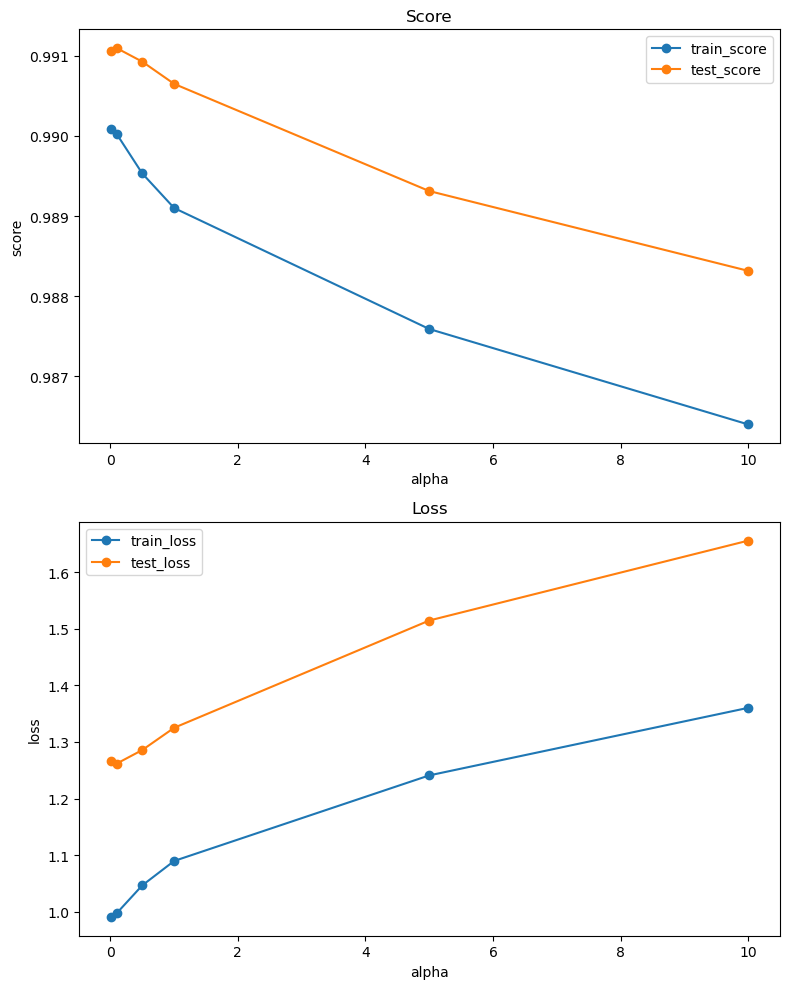

--- M Lasso plot ---


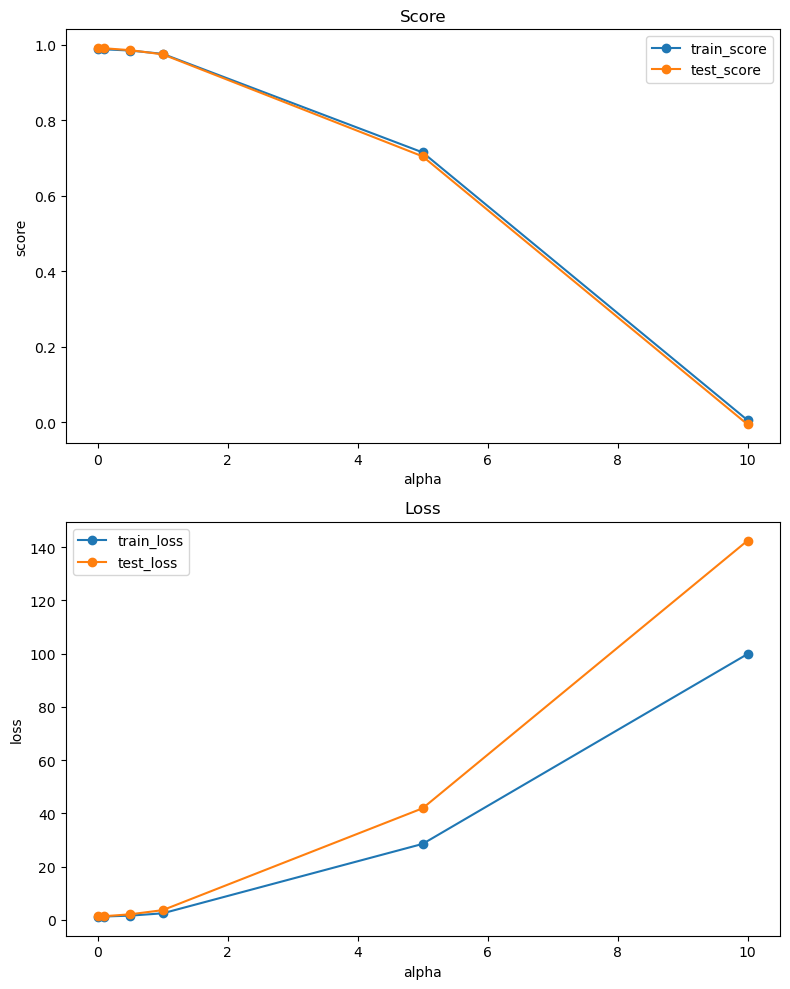

--- M ElasticNet plot ---


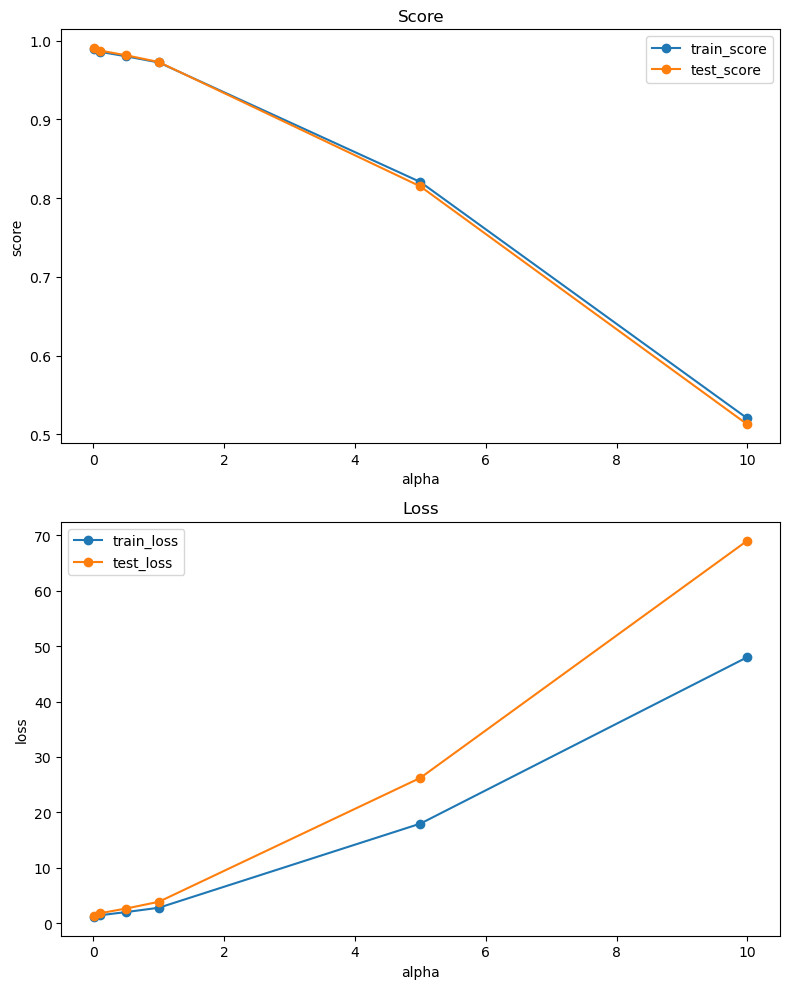

=== LinearRegression 결과 ===
   alpha  train_score  test_score  train_loss  test_loss
0    0.0     0.990089    0.991051    0.990892   1.268089
1    0.0     0.990089    0.991051    0.990892   1.268089 

--- M LinearRegression plot ---


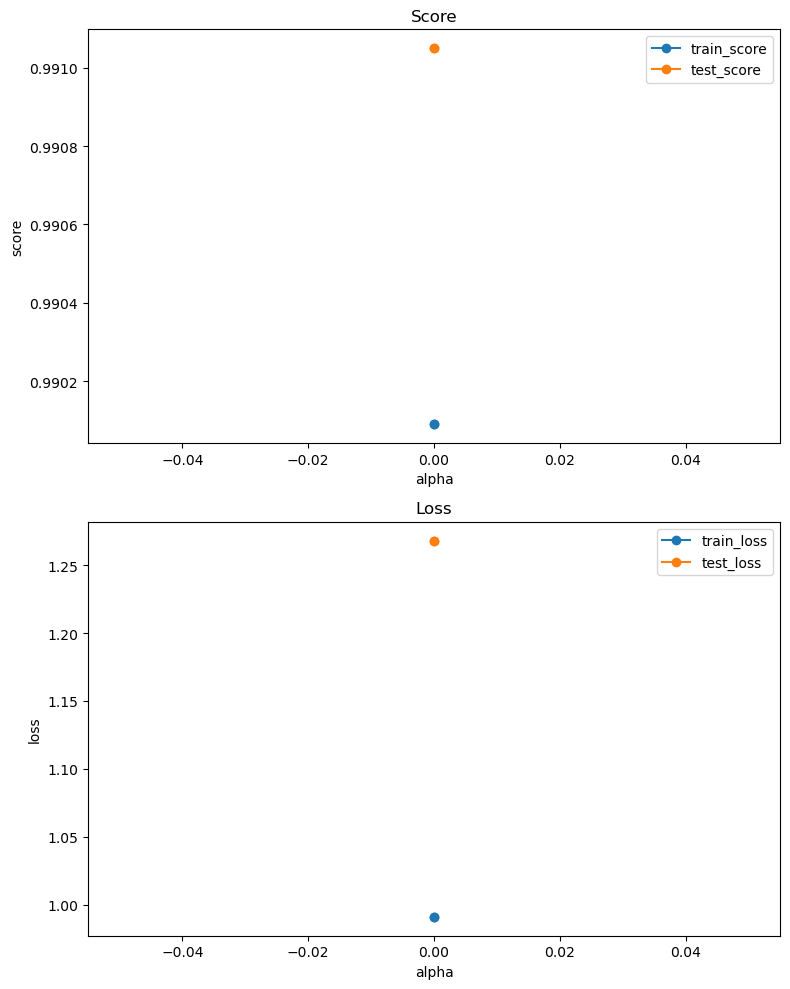


==== 최종 예측 성능(Ridge) : [M] ====
R2 Score: 0.9883, RMSE: 1.2867
==== 최종 예측 성능(Lasso) : [M] ====
R2 Score: -0.0053, RMSE: 11.9351
==== 최종 예측 성능(ElasticNet) : [M] ====
R2 Score: 0.5126, RMSE: 8.3100
==== 최종 예측 성능(Linear) : [M] ====
R2 Score: 0.9911, RMSE: 1.1261
=== Ridge 결과 ===
   alpha  train_score  test_score  train_loss  test_loss
0   0.01     0.987219    0.985109    1.864587   2.355006
1   0.10     0.987139    0.984770    1.876106   2.408696
2   0.50     0.986519    0.983424    1.966037   2.621551
3   1.00     0.985936    0.982326    2.050548   2.795261
4   5.00     0.983882    0.978685    2.348271   3.370994
5  10.00     0.982532    0.976372    2.544196   3.736807 

=== Lasso 결과 ===
   alpha  train_score  test_score  train_loss   test_loss
0   0.01     0.986600    0.984975    1.954512    2.376250
1   0.10     0.984470    0.979596    2.263496    3.226937
2   0.50     0.982401    0.978715    2.563874    3.366205
3   1.00     0.976658    0.973401    3.398277    4.206637
4   5.00     0

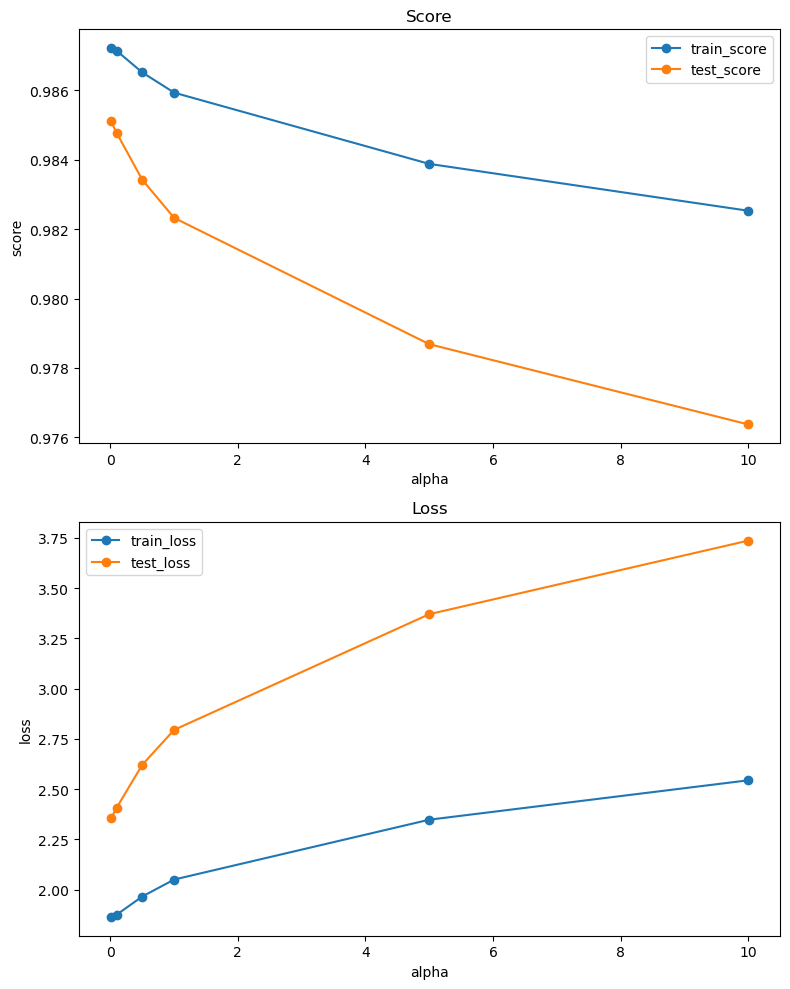

--- W Lasso plot ---


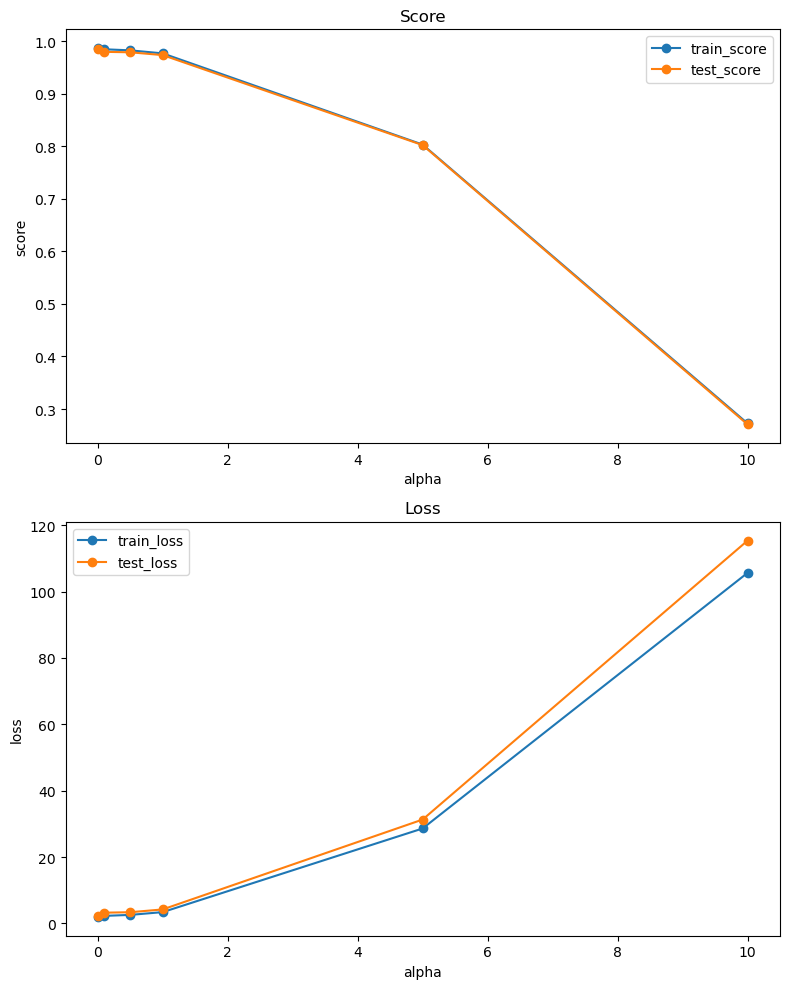

--- W ElasticNet plot ---


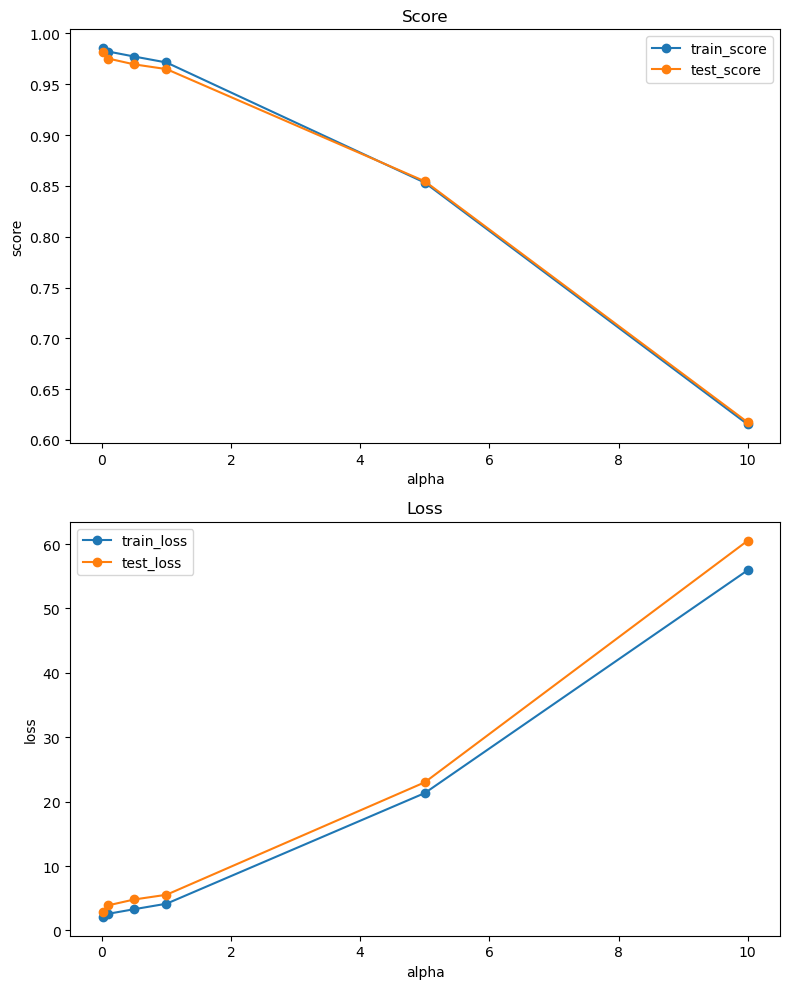

=== LinearRegression 결과 ===
   alpha  train_score  test_score  train_loss  test_loss
0    0.0      0.98722    0.985144     1.86442   2.349465
1    0.0      0.98722    0.985144     1.86442   2.349465 

--- W LinearRegression plot ---


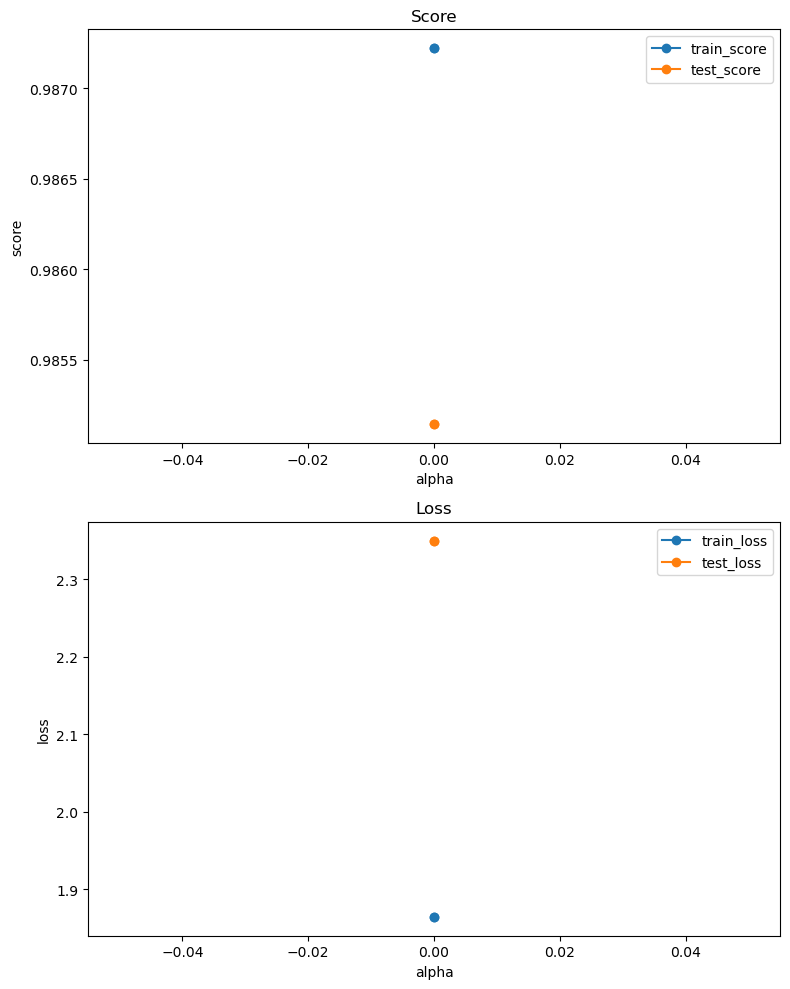


==== 최종 예측 성능(Ridge) : [W] ====
R2 Score: 0.9764, RMSE: 1.9331
==== 최종 예측 성능(Lasso) : [W] ====
R2 Score: 0.2708, RMSE: 10.7392
==== 최종 예측 성능(ElasticNet) : [W] ====
R2 Score: 0.6173, RMSE: 7.7798
==== 최종 예측 성능(Linear) : [W] ====
R2 Score: 0.9851, RMSE: 1.5328

모든 작업이 완료되었습니다.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# lr_def.py 내부 함수 임포트
from lr_def import (
    plot_features_and_target,
    split_train_test,
    regression_kfold_analysis,
    LinearRegression_kfold_analysis,
    plot_regression_results,
    predict_and_evaluate_model,

)

#########################################
# 1. 파일 경로 지정
m_ncaa_file   = "../data2/MNCAATourneyDetailedResults.csv"
m_regular_file= "../data2/MRegularSeasonDetailedResults.csv"
w_ncaa_file   = "../data2/WNCAATourneyDetailedResults.csv"
w_regular_file= "../data2/WRegularSeasonDetailedResults.csv"

#########################################
# 2. CSV 불러오고 Season <= 2023 제거, WLoc 컬럼 제거
def load_and_filter_data(file_path, season_col='Season', wloc_col='WLoc', season_threshold=2023):
    """
    file_path        : CSV 파일 경로
    season_col       : 시즌 컬럼명(기본 'Season')
    wloc_col         : 승리팀 위치 컬럼명(기본 'WLoc')
    season_threshold : 이 값 이하인 시즌은 모두 제거
    """
    df = pd.read_csv(file_path)
    # season <= 2023 제거
    df = df[df[season_col] > season_threshold]
    # WLoc 컬럼 제거 (있다면)
    if wloc_col in df.columns:
        df.drop(columns=[wloc_col], inplace=True)
    return df

# 남자 NCAA + RegularSeason
m_ncaa   = load_and_filter_data(m_ncaa_file)
m_regular= load_and_filter_data(m_regular_file)

# 여자 NCAA + RegularSeason
w_ncaa   = load_and_filter_data(w_ncaa_file)
w_regular= load_and_filter_data(w_regular_file)

#########################################
# 3. 결합 후, WTeamID 기준 그룹화 -> 숫자형 컬럼 합산 + now(등장 횟수) 추가
def combine_and_aggregate(df1, df2, group_col='WTeamID'):
    """
    두 DataFrame(df1, df2)를 세로 방향으로 concat 후,
    group_col 기준으로 그룹화하여 숫자형 컬럼 모두 합산,
    그룹 내 row 수를 now 컬럼으로 추가,
    now 내림차순으로 정렬 후 반환
    """
    combined = pd.concat([df1, df2], ignore_index=True)

    # 그룹별 등장 횟수(now)
    size_df = combined.groupby(group_col).size().reset_index(name='now')

    # 숫자형만 합산
    sum_df = combined.groupby(group_col).sum(numeric_only=True).reset_index()

    # 두 DF 병합 -> 최종
    final_df = pd.merge(sum_df, size_df, on=group_col, how='left')

    # now 기준 내림차순
    final_df.sort_values(by='now', ascending=False, inplace=True)
    final_df.reset_index(drop=True, inplace=True)

    return final_df

m_df_agg = combine_and_aggregate(m_ncaa, m_regular, group_col='WTeamID')
w_df_agg = combine_and_aggregate(w_ncaa, w_regular, group_col='WTeamID')

print("=== M combined data preview ===")
print(m_df_agg.head(), "\n")
print("=== W combined data preview ===")
print(w_df_agg.head(), "\n")

#########################################
# 4. 이번에는 사용자 요청대로 해당 14개 컬럼을 피처로 고정
fixed_feature_cols = [
    'WScore','WFGM','WFGA','WFGM3','WFGA3','WFTM','WFTA',
    'WOR','WDR','WAst','WTO','WStl','WBlk','WPF'
]

# (참고) 만약 각 데이터(M/W)에 해당 컬럼이 없는 경우(혹은 NaN이 많을 경우) 대비:
#        이후 단계에서 dropna(subset=고정컬럼+['now']) 처리

# 시각화를 위해 feature와 target=now 설정 (고정 피처 목록 사용)
def plot_features(df, feature_cols, target_col='now'):
    # 대상 컬럼이 모두 DataFrame 안에 있는지 확인
    valid_cols = [c for c in feature_cols if c in df.columns]
    if len(valid_cols) > 0:
        plot_features_and_target(df, valid_cols, target_col)
    else:
        print(f"Plot skipped: {valid_cols} not found in DataFrame.")

# M 데이터, W 데이터 각각 scatter plot
plot_features(m_df_agg, fixed_feature_cols, 'now')
plot_features(w_df_agg, fixed_feature_cols, 'now')

#########################################
# 5. (선택) 전처리 (예: StandardScaler) – 필요시 사용
def apply_scaler(df, columns):
    """
    df 의 특정 columns 에 StandardScaler를 적용한 예시
    원본 df를 복사 후 해당 컬럼만 스케일 변환
    """
    from sklearn.preprocessing import StandardScaler
    df_copy = df.copy()
    # 실제로 존재하는 컬럼들에 한해서만 적용
    columns_to_scale = [col for col in columns if col in df_copy.columns]
    if len(columns_to_scale) > 0:
        scaler = StandardScaler()
        scaled_values = scaler.fit_transform(df_copy[columns_to_scale])
        df_copy[columns_to_scale] = scaled_values
    return df_copy

# M/W 각각 고정 피처에 대해 스케일링 (선택)
m_df_scaled = apply_scaler(m_df_agg, fixed_feature_cols)
w_df_scaled = apply_scaler(w_df_agg, fixed_feature_cols)

#########################################
# 6. train/test 분리 후, 회귀분석 진행
def do_regression_analysis(df, feature_cols, target_col='now', label='M'):
    """
    df           : 분석할 데이터프레임
    feature_cols : 회귀에 사용할 컬럼들(고정)
    target_col   : 타겟(기본 now)
    label        : 표출용(M 또는 W 등)
    """
    # feature_cols 중 실제 df에 존재하는 것만 추출
    valid_features = [col for col in feature_cols if col in df.columns]
    if len(valid_features) == 0:
        print(f"[{label}] 분석에 사용할 유효한 피처가 없습니다.")
        return

    # 결측 제거
    use_cols = valid_features + [target_col]
    df = df.dropna(subset=use_cols).copy()
    if len(df) < 5:
        print(f"[{label}] 데이터가 너무 적어서 회귀분석이 어렵습니다.")
        return
    
    X = df[valid_features]
    y = df[target_col]

    # train/test split
    x_train, x_test, y_train, y_test = split_train_test(X, y, test_size=0.2, random_state=42)

    # 1) Ridge, Lasso, ElasticNet
    ridge_df, lasso_df, elastic_df, ridge_model, lasso_model, elastic_model = regression_kfold_analysis(
        x_train, x_test, y_train, y_test,
        alpha_list=[0.01, 0.1, 0.5, 1, 5, 10]  # 예시
    )

    # plot
    print(f"\n--- {label} Ridge plot ---")
    plot_regression_results(ridge_df)
    print(f"--- {label} Lasso plot ---")
    plot_regression_results(lasso_df)
    print(f"--- {label} ElasticNet plot ---")
    plot_regression_results(elastic_df)

    # 2) LinearRegression
    linear_df, linear_model = LinearRegression_kfold_analysis(x_train, x_test, y_train, y_test)
    print(f"--- {label} LinearRegression plot ---")
    plot_regression_results(linear_df)

    # 3) 예측 성능(R2, RMSE)
    print(f"\n==== 최종 예측 성능(Ridge) : [{label}] ====")
    predict_and_evaluate_model(ridge_model, x_test, y_test)

    print(f"==== 최종 예측 성능(Lasso) : [{label}] ====")
    predict_and_evaluate_model(lasso_model, x_test, y_test)

    print(f"==== 최종 예측 성능(ElasticNet) : [{label}] ====")
    predict_and_evaluate_model(elastic_model, x_test, y_test)

    print(f"==== 최종 예측 성능(Linear) : [{label}] ====")
    predict_and_evaluate_model(linear_model, x_test, y_test)


#########################################
# 7. 실제 실행
# (1) 남자 데이터
do_regression_analysis(m_df_scaled, fixed_feature_cols, target_col='now', label='M')

# (2) 여자 데이터
do_regression_analysis(w_df_scaled, fixed_feature_cols, target_col='now', label='W')

